# Flood Adaptation: Minimal Model

This python script outlines a basic Agent-Based Model (ABM) developed using the Mesa framework, designed as a simplified representation of household adaptation to flood events in a social network context. The model serves as a template for understanding the fundamental mechanics of flood adapdtation with a given social network.

This directory is structured as follows:
 - A Mesa Agent class `Households` is defined in `agents.py`
 - A Mesa Agent class `Government` is defined in `agents.py` (this agent currently does not perform any action)
 - A Mesa Model class `AdaptationModel` is defined in `model.py`
 - This notebook `demo.ipynb` provides a demonstration of the model and its visualization.

Each household agent in the model represents a household with attributes and behaviors that determine its response to flood events. The flood depth attribute assigned to each household is currently random for demonstration purposes. The decision by each household to adapt is also arbitrary. In a more comprehensive model, this could be replaced with more sophisticated decision-making algorithms.

The current implementation includes several simplifications and arbitrary choices, such as random flood depths and basic adaptation logic based on random thresholds. These aspects are designed for clarity and ease of understanding and should be replaced with realistic and sound choices.

You are encouraged to modify, expand, and customize the model. This might include integrating real-world data, implementing more complex decision-making processes for agents, or exploring different network topologies and their effects on social dynamics.

The visualisation provided is basic. Additional aspects can be added for visualization and more in-depth analysis.

_This notebook was tested on 2023-11-13 with Mesa version 2.1.4 on Python 3.12.0._

# Running the model and visualizing the model domain and social network over time

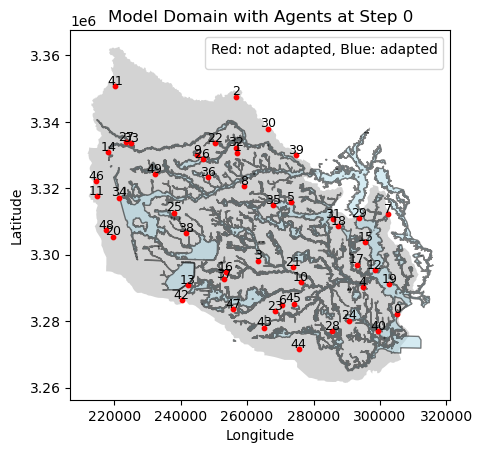

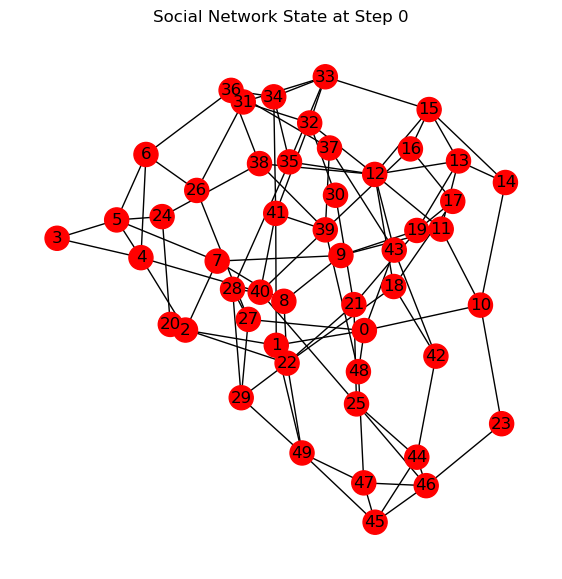

<Figure size 1000x600 with 0 Axes>

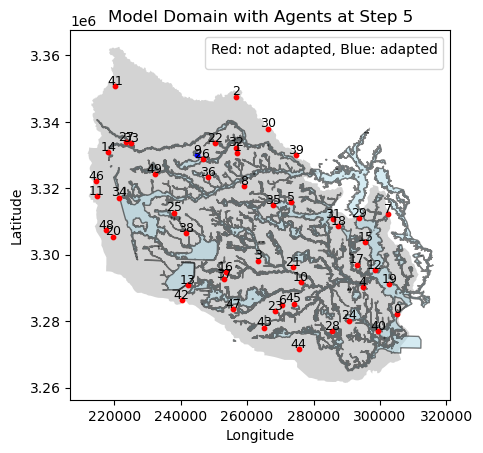

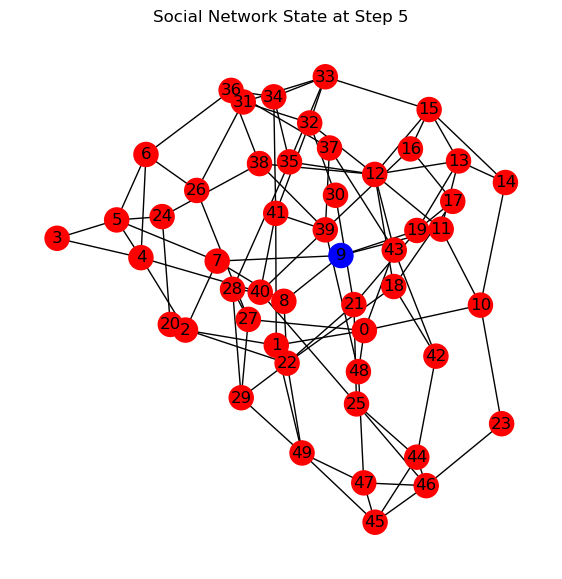

<Figure size 1000x600 with 0 Axes>

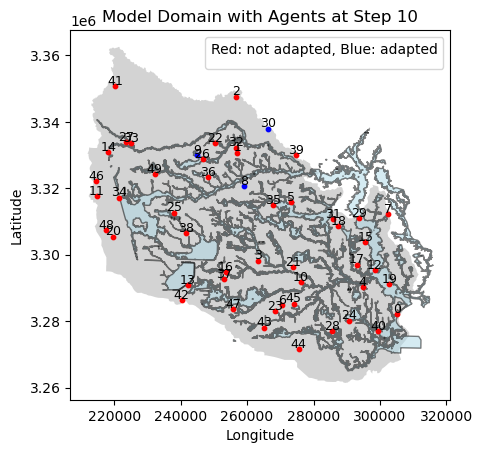

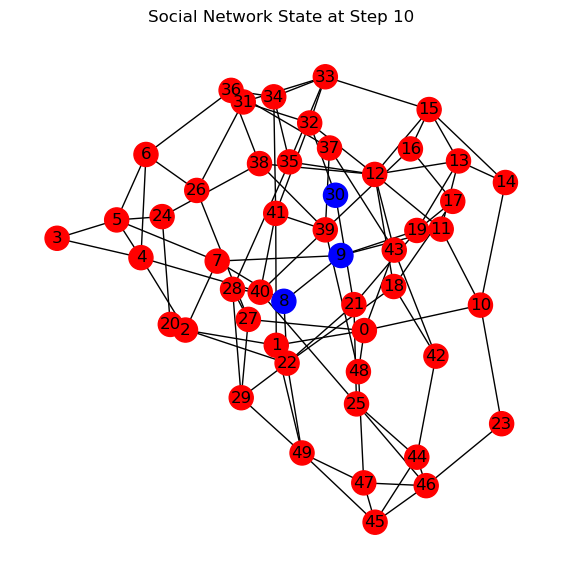

<Figure size 1000x600 with 0 Axes>

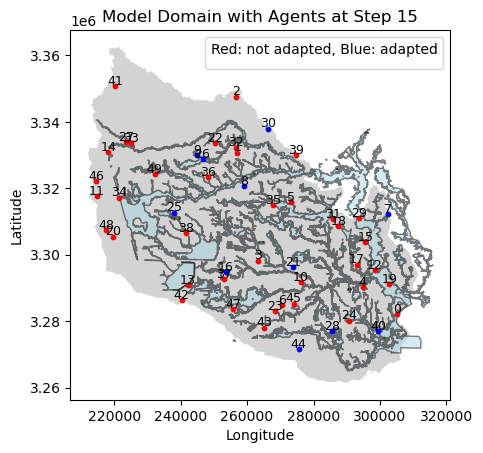

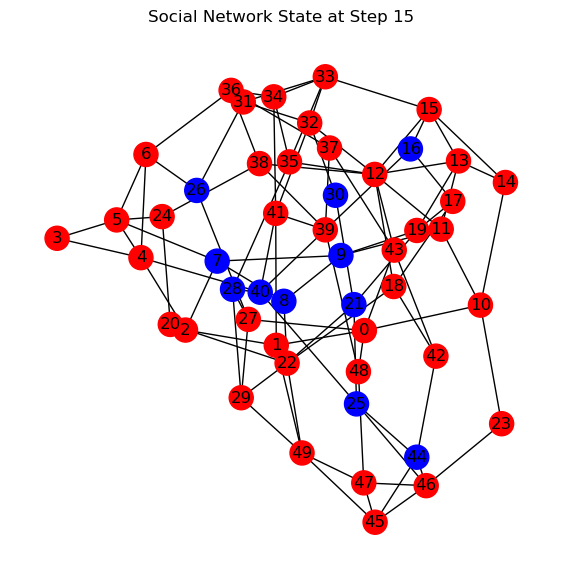

<Figure size 1000x600 with 0 Axes>

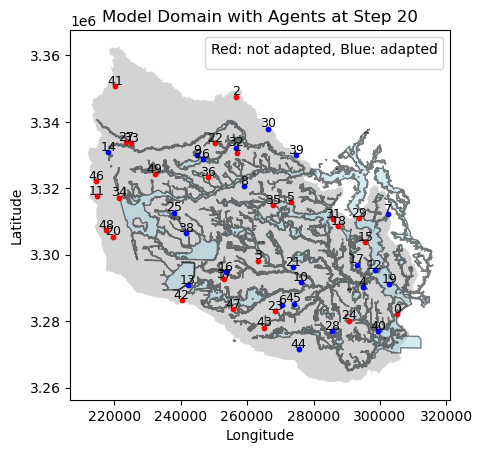

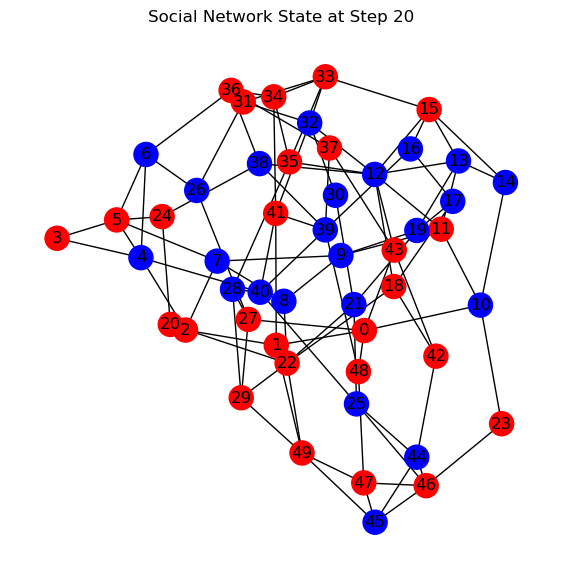

In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx

# Initialize the Adaptation Model with 50 household agents.
model = AdaptationModel(number_of_households=50, flood_map_choice="harvey", network="watts_strogatz") # flood_map_choice can be "harvey", "100yr", or "500yr"

# Calculate positions of nodes for the network plot.
# The spring_layout function positions nodes using a force-directed algorithm,
# which helps visualize the structure of the social network.
pos = nx.spring_layout(model.G)

# Define a function to plot agents on the network.
# This function takes a matplotlib axes object and the model as inputs.
def plot_network(ax, model):
    # Clear the current axes.
    ax.clear()
    # Determine the color of each node (agent) based on their adaptation status.
    colors = ['blue' if agent.is_adapted else 'red' for agent in model.schedule.agents]
    # Draw the network with node colors and labels.
    nx.draw(model.G, pos, node_color=colors, with_labels=True, ax=ax)
    # Set the title of the plot with the current step number.
    ax.set_title(f"Social Network State at Step {model.schedule.steps}", fontsize=12)

# Generate the initial plots at step 0.
# Plot the spatial distribution of agents. This is a function written in the model.py
model.plot_model_domain_with_agents()

# Plot the initial state of the social network.
fig, ax = plt.subplots(figsize=(7, 7))
plot_network(ax, model)
plt.show()

# Run the model for 20 steps and generate plots every 5 steps.
for step in range(20):
    model.step()

    # Every 5 steps, generate and display plots for both the spatial distribution and network.
    # Note the first step is step 0, so the plots will be generated at steps 4, 9, 14, and 19, which are the 5th, 10th, 15th, and 20th steps.
    if (step + 1) % 5 == 0:
        # Plot for the spatial map showing agent locations and adaptation status.
        plt.figure(figsize=(10, 6))
        model.plot_model_domain_with_agents()

        # Plot for the social network showing connections and adaptation statuses.
        fig, ax = plt.subplots(figsize=(7, 7))
        plot_network(ax, model)
        plt.show()



In [2]:
agent_data = model.datacollector.get_agent_vars_dataframe()
#agent_data['Worry'].describe()
#agent_data.worry
agent_data['Age'].describe()
agent_data

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
0    0                   0.349649              0.464826          0.000000   
     1                   0.000000              0.000000          0.000000   
     2                   0.731174              0.593632          0.000000   
     3                   0.000000              0.000000          0.000000   
     4                   0.433268              0.502265          0.000000   
...                           ...                   ...               ...   
19   45                  0.709996              0.588500          0.723957   
     46                  0.213242              0.378485          0.113144   
     47                  0.372152              0.475716          0.302949   
     48                  0.276028              0.423545          0.318450   
     49                  0.000000              0.000000          0.000000   

              FloodDamageActual  IsAdapted  FriendsCount  \
Step AgentID                                               
0    0                 0.000000      False             5   
     1                 0.000000      False             4   
     2                 0.000000      False             3   
     3                 0.000000      False             2   
     4                 0.000000      False             5   
...                         ...        ...           ...   
19   45                0.118380       True             4   
     46                0.267830      False             5   
     47                0.439794      False             4   
     48                0.448507      False             3   
     49                0.000000      False             5   

                                                   location     Worry  \
Step AgentID                                                            
0    0         POINT (305137.50291799684 3282175.252612962)  0.164659   
     1        POINT (257074.90278428415 3330782.1677127033)  0.180157   
     2          POINT (256788.593361345 3347610.1774571696)  0.118889   
     3          POINT (263237.465662338 3298230.1793193114)  0.156012   
     4         POINT (294802.2302272931 3290248.9690579795)  0.352714   
...                                                     ...       ...   
19   45        POINT (273993.6175819779 3285322.0623705178)  0.130000   
     46        POINT (214625.25889418068 3322200.399703028)  0.711293   
     47       POINT (255797.10140886833 3283554.2406750815)  0.694801   
     48        POINT (217640.19317095296 3307342.685425181)  0.806603   
     49         POINT (232154.6385951182 3324405.904055562)  0.747550   

              Self_Adaption  Self_Investment  Avg_Invest Neighbours  \
Step AgentID                                                          
0    0                    0              0.0           0         []   
     1                    0              0.0           0         []   
     2                    0              0.0           0         []   
     3                    0              0.0           0         []   
     4                    0              0.0           0         []   
...                     ...              ...         ...        ...   
19   45                   1              0.8           0         []   
     46                   0              0.0           0         []   
     47                   0              0.0           0         []   
     48                   0              0.0           0         []   
     49                   0              0.0           0         []   

                    Income        Age  Costs   W2P  
Step AgentID                                        
0    0        30255.058158  44.883593    1.0  None  
     1        21525.962208  32.852128    1.0  None  
     2        68511.487946  46.219233    1.0  None  
     3         4008.622428  35.582033    1.0  None  
     4        26503.429909  36.041003  

In [29]:
agent_data.groupby(by='Step')['Worry'].mean()

Step
0     0.216700
1     0.246700
2     0.276700
3     0.306700
4     0.336700
5     0.359180
6     0.389180
7     0.405254
8     0.435254
9     0.465254
10    0.495254
11    0.515397
12    0.545397
13    0.551442
14    0.549301
15    0.559883
16    0.574839
17    0.594193
18    0.562095
19    0.591495
Name: Worry, dtype: float64

Text(0.5, 1.0, 'Flood measurement active (last round)')

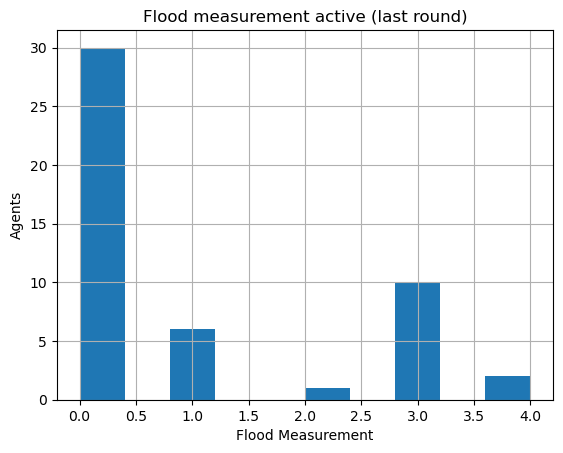

In [28]:
agent_data.iloc[-50:-1]['Self_Adaption'].hist()
plt.ylabel('Agents')
plt.xlabel('Flood Measurement')
plt.title('Flood measurement active (last round)')

In [30]:
agent_data.groupby(by='Step')['Costs'].mean()

Step
0     1.000000
1     1.000000
2     1.000000
3     1.000000
4     1.000000
5     0.998000
6     0.998000
7     0.988667
8     0.988667
9     0.988667
10    0.988667
11    0.983333
12    0.983333
13    0.975000
14    0.969400
15    0.963400
16    0.958067
17    0.956067
18    0.945333
19    0.945333
Name: Costs, dtype: float64

In [5]:
agent_data.iloc[-50:-1]

FloodDepthEstimated  FloodDamageEstimated  FloodDepthActual  \
Step AgentID                                                                
19   0                   0.349649              0.464826          0.263211   
     1                   0.000000              0.000000          0.000000   
     2                   0.731174              0.593632          0.508851   
     3                   0.000000              0.000000          0.000000   
     4                   0.433268              0.502265          0.270726   
     5                   0.000000              0.000000          0.000000   
     6                   0.798745              0.609065          0.607056   
     7                   0.491480              0.524276          0.559105   
     8                   1.267731              0.689720          0.667090   
     9                   2.305939              0.794176          2.125020   
     10                  1.475421              0.716210          0.984039   
     11                  0.478699              0.519675          0.431659   
     12                  1.365748              0.702723          1.181004   
     13                  1.420183              0.709547          1.637226   
     14                  0.170059              0.338977          0.120062   
     15                  0.192541              0.360656          0.197732   
     16                 11.553540              1.000000         12.249658   
     17                  0.250427              0.406551          0.198819   
     18                  0.839715              0.617799          0.485318   
     19                  2.564923              0.812761          2.927741   
     20                  0.698643              0.585686          0.695733   
     21                  0.583784              0.554326          0.626424   
     22                  0.000000              0.000000          0.000000   
     23                  0.491578              0.524311          0.498343   
     24                  0.599029              0.558827          0.652929   
     25                  1.267014              0.689621          0.936388   
     26                  1.788109              0.749770          0.937771   
     27                  0.000000              0.000000          0.000000   
     28                  0.439227              0.504650          0.399532   
     29                  0.259444              0.412727          0.228613   
     30                  2.902323              0.834338          1.666481   
     31                  0.196435              0.364152          0.179269   
     32                  0.000000              0.000000          0.000000   
     33                  1.326813              0.697673          1.547243   
     34                  0.000000              0.000000          0.000000   
     35                  0.807276              0.610920          0.519857   
     36                  0.379513              0.479136          0.433859   
     37                  1.535334              0.723159          0.991152   
     38                  0.279976              0.426025          0.292675   
     39                  0.293835              0.434461          0.308325   
     40                  0.987070              0.646028          0.986142   
     41                  0.299141              0.437586          0.358612   
     42                  0.381399              0.480002          0.335267   
     43                  0.000000              0.000000          0.000000   
     44                  0.743109              0.596459          0.676759   
     45                  0.709996              0.588500          0.723957   
     46                  0.213242              0.378485          0.113144   
     47                  0.372152              0.475716          0.302949   
     48                  0.276028              0.423545          0.318450   

              FloodDamageActual  IsAdapted  FriendsCount  \
Step AgentID              

<Axes: >

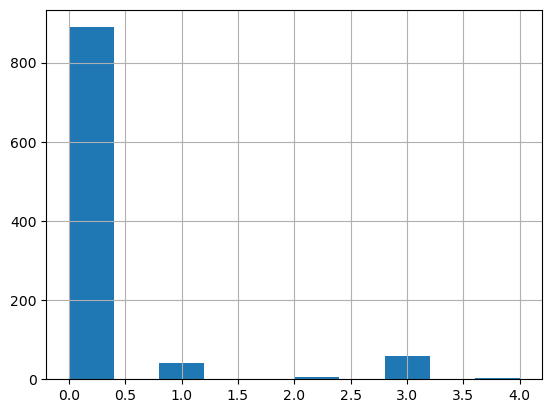

In [6]:
#last round Adaptation measurements: (step19)
agent_data['Self_Adaption'].hist()
#worry needs to have higher impact 

In [7]:
agent_data['FriendsCount']

Step  AgentID
0     0          5
      1          4
      2          3
      3          2
      4          5
                ..
19    45         4
      46         5
      47         4
      48         3
      49         5
Name: FriendsCount, Length: 1000, dtype: int64

<Axes: xlabel='Step'>

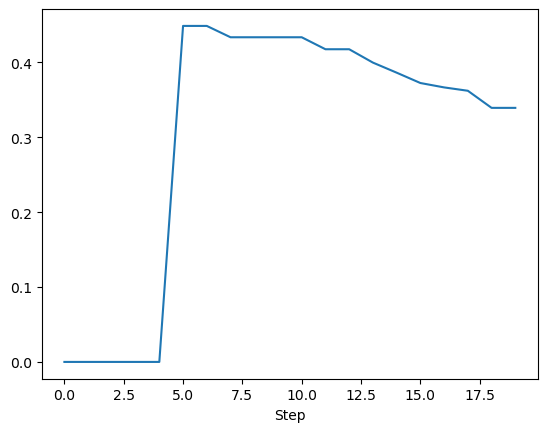

In [8]:
agent_data.groupby(by='Step')['FloodDamageActual'].mean().plot()
#agent_data.groupby(by='Step')['A].mean().plot()

<Axes: xlabel='Step'>

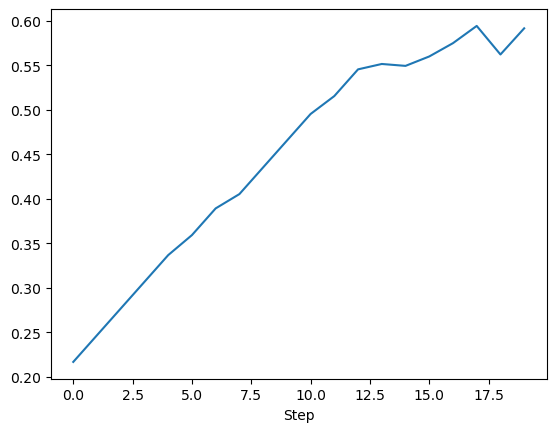

In [9]:
agent_data.groupby(by='Step')['Worry'].mean().plot()

In [10]:
agent_data.groupby(by='Step')['Self_Investment'].mean()
agent_data.

SyntaxError: invalid syntax (2309412609.py, line 2)

In [ ]:
agent_data.iloc[-100:-51]['FloodDamageActual'].mean()

0.004834292863336386

In [ ]:
agent_data.iloc[-500:-451]['FloodDamageActual'].mean()

0.03889760421828706

In [ ]:
agent_data.iloc[-600:-551]['FloodDamageActual'].mean()

0.07731505800659685

In [ ]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data
#change

,total_adapted_households
0,0
1,8
2,11
3,14
4,18
5,23
6,27
7,31
8,33
9,35
